In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.insert(0, '..')

from Approximators import SKApproximator, AAAApproximator, PolelessBarycentric
import Approximators.Bernstein.CauchySimplex as Bernstein
import Approximators.LinearizedBernstein.CauchySimplex as LinearizedBernstein

In [3]:
from CubicSpline import NaturalCubic

In [4]:
from patsy import dmatrix, build_design_matrices
from sklearn.linear_model import LinearRegression

In [5]:
x = np.random.rand(100)

In [6]:
# import Approximators
# Approximators.ignore_warnings()

In [7]:
n = 10
m = n

approximators = {'Bernstein': Bernstein(n, m, max_iter=1000, gamma=0.9, stopping_tol=0),
                 'Linearized Bernstein': LinearizedBernstein(n, m, max_iter=1000, gamma=0.5),
                 'Natural Spline': NaturalCubic(2 * n),
                 'Polynomial': Bernstein(2 * n, 0),
                 'Poleless Barycentric': PolelessBarycentric(n + 1, m + 1),
                 'Sanathan-Koerner': SKApproximator(n, m),
                 'AAA': AAAApproximator(n + 1, m + 1)}

In [8]:
working_folder = 'approximator_plots'

# With Noise

In [9]:
N = 1000

In [10]:
f = lambda x: np.arctan(50 * (x - 0.5))

## Large Noise

In [20]:
random_seed = sum([ord(x) for x in 'arctan']) % 10
np.random.seed(random_seed)

x = np.random.rand(N)
y_large_noise = f(x) + np.random.normal(0, 0.1, size=N)

In [21]:
np.savetxt('x.csv', x, delimiter=',')
np.savetxt('y_large_noise.csv', y_large_noise, delimiter=',')

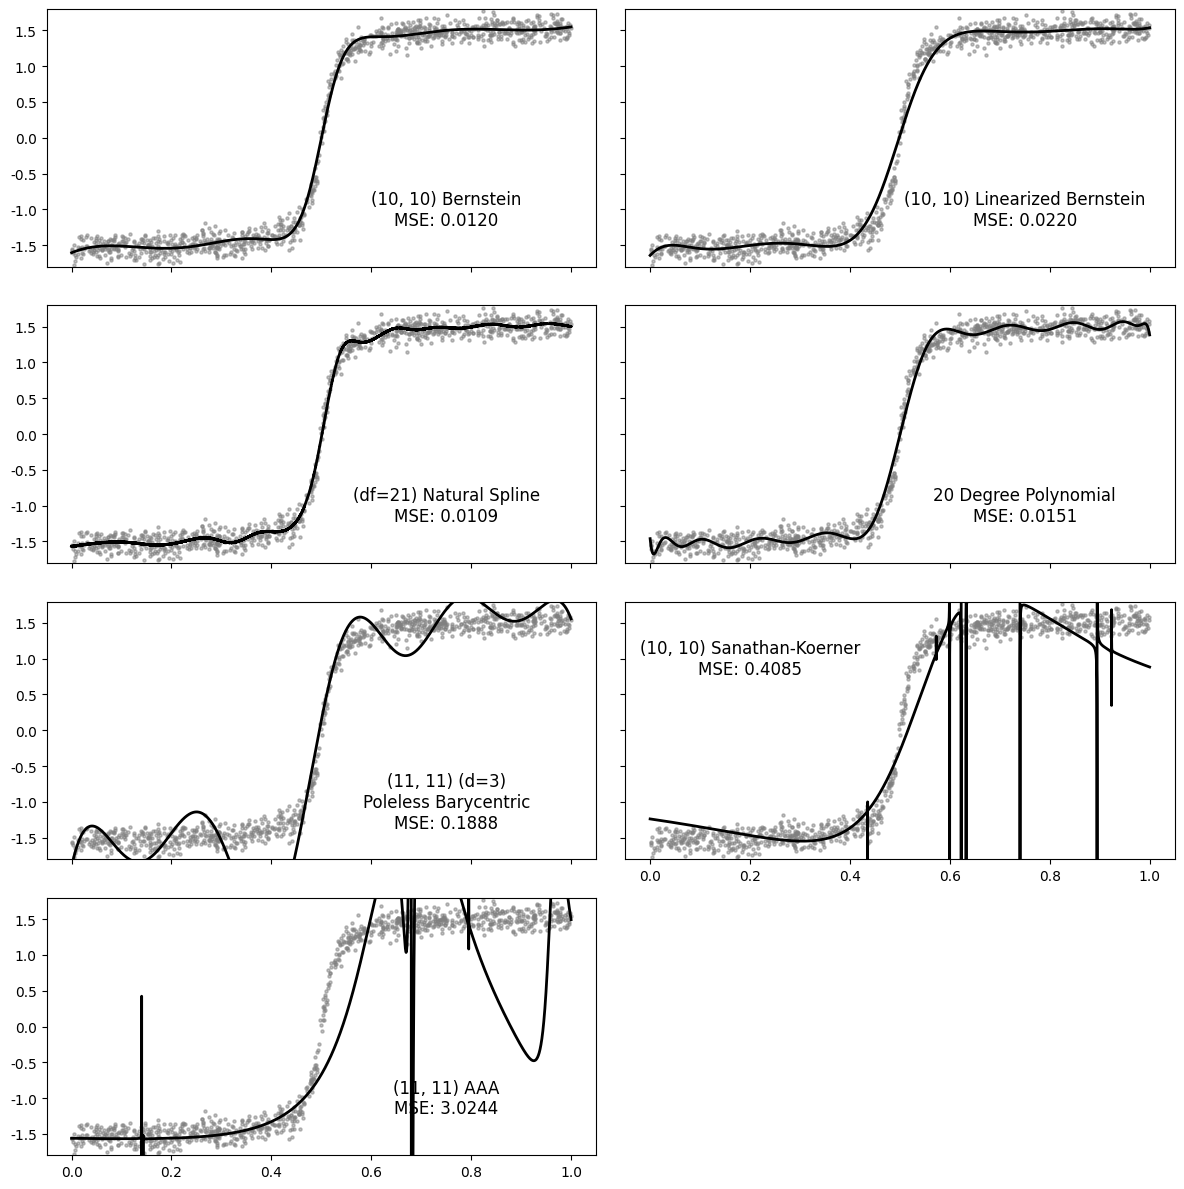

In [22]:
fig = plt.figure(figsize=(12, 12))

x_vals = np.linspace(0, 1, 20_001)

i = 0
for name, approximator in approximators.items():
    plt.subplot(4, 2, i + 1)
    plt.scatter(x, y_large_noise, alpha=0.5, s=5, color='grey')
    
    approximator.fit(x, y_large_noise)
    mse = np.mean((approximator(x) - y_large_noise) ** 2)
    
    plt.plot(x_vals, approximator(x_vals), linewidth=2, color='black')
    
    plt.ylim(-1.8, 1.8)
    if name == 'Polynomial':
        plt.text(0.75, -1, f"{approximator.n} Degree Polynomial\nMSE: {mse:.4f}", 
             fontsize=12, horizontalalignment='center', verticalalignment='center')
    elif name == 'Sanathan-Koerner':
        plt.text(0.2, 1, f"{approximator.n, approximator.m} {name}\nMSE: {mse:.4f}", 
             fontsize=12, horizontalalignment='center', verticalalignment='center')
    elif name == 'Poleless Barycentric':
        plt.text(0.75, -1, f"{approximator.n, approximator.m} (d={approximator.d})\n{name}\nMSE: {mse:.4f}", 
             fontsize=12, horizontalalignment='center', verticalalignment='center')
    elif name == 'Natural Spline':
        plt.text(0.75, -1, f"(df={approximator.df + 1}) {name}\nMSE: {mse:.4f}", 
             fontsize=12, horizontalalignment='center', verticalalignment='center')
    else:
        plt.text(0.75, -1, f"{approximator.n, approximator.m} {name}\nMSE: {mse:.4f}", 
             fontsize=12, horizontalalignment='center', verticalalignment='center')
    
    if i < 5:
        plt.xticks(np.linspace(0, 1, 6), [None] * 6)
    else:
        plt.xticks(np.linspace(0, 1, 6), [round(x, 1) for x in np.linspace(0, 1, 6)])
    
    if (i + 1) % 2 == 0:
        plt.yticks(np.linspace(-1.5, 1.5, 7), [None] * 7)
    else:
        plt.yticks(np.linspace(-1.5, 1.5, 7), [round(x, 1) for x in np.linspace(-1.5, 1.5, 7)])
    
    i += 1
    
plt.tight_layout()
plt.savefig(f"{working_folder}/large_noisy_data_fits.png", dpi=150)

In [23]:
random_seed = sum([ord(x) for x in 'arctan']) % 10
np.random.seed(random_seed)

x = np.random.rand(N)
y_small_noise = f(x) + np.random.normal(0, 0.01, size=N)

In [24]:
np.savetxt('y_small_noise.csv', y_small_noise, delimiter=',')

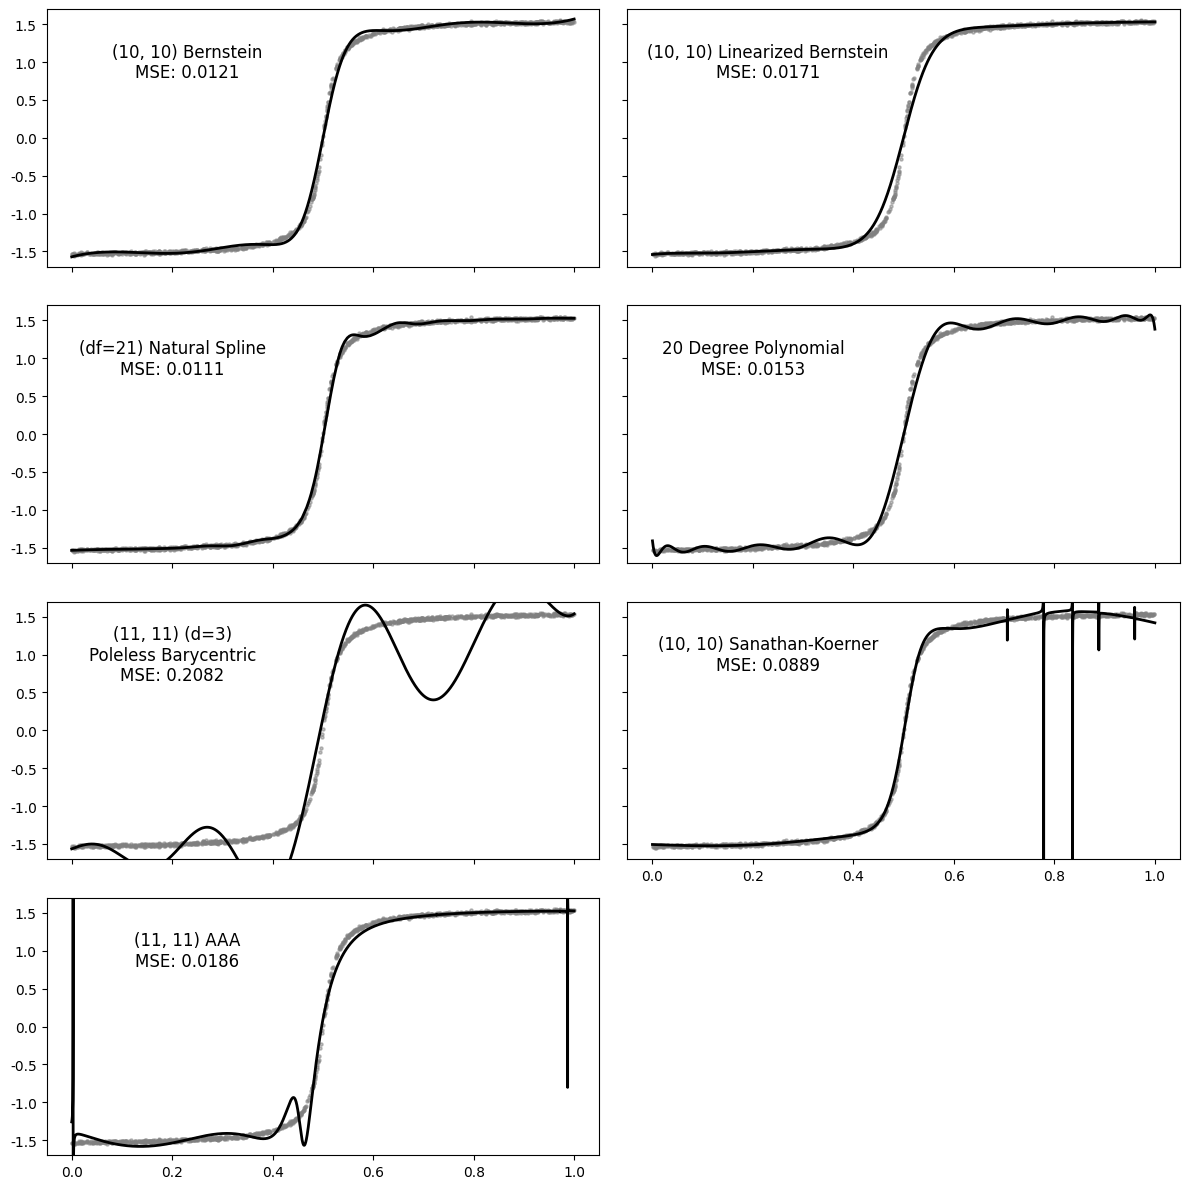

In [25]:
plt.figure(figsize=(12, 12))

x_vals = np.linspace(0, 1, 20_001)

i = 0
for name, approximator in approximators.items():
    plt.subplot(4, 2, i + 1)
    plt.scatter(x, y_small_noise, alpha=0.5, s=5, color='grey')
    
    approximator.fit(x, y_small_noise)
    mse = np.mean((approximator(x) - y_large_noise) ** 2)
    
    plt.plot(x_vals, approximator(x_vals), linewidth=2, color='black')
    
    plt.ylim(-1.7, 1.7)
    if name == 'Polynomial':
        plt.text(0.2, 1, f"{approximator.n} Degree Polynomial\nMSE: {mse:.4f}", 
             fontsize=12, horizontalalignment='center', verticalalignment='center')
    elif name == 'Poleless Barycentric':
        plt.text(0.2, 1, f"{approximator.n, approximator.m} (d={approximator.d})\n{name}\nMSE: {mse:.4f}", 
             fontsize=12, horizontalalignment='center', verticalalignment='center')
    elif name == 'Natural Spline':
        plt.text(0.2, 1, f"(df={approximator.df + 1}) {name}\nMSE: {mse:.4f}", 
             fontsize=12, horizontalalignment='center', verticalalignment='center')
    else:
        plt.text(0.23, 1, f"{approximator.n, approximator.m} {name}\nMSE: {mse:.4f}", 
             fontsize=12, horizontalalignment='center', verticalalignment='center')
    
    if i < 5:
        plt.xticks(np.linspace(0, 1, 6), [None] * 6)
    else:
        plt.xticks(np.linspace(0, 1, 6), [round(x, 1) for x in np.linspace(0, 1, 6)])
    
    if (i + 1) % 2 == 0:
        plt.yticks(np.linspace(-1.5, 1.5, 7), [None] * 7)
    else:
        plt.yticks(np.linspace(-1.5, 1.5, 7), [round(x, 1) for x in np.linspace(-1.5, 1.5, 7)])
    
    i += 1
    
plt.tight_layout()
plt.savefig(f"{working_folder}/small_noisy_data_fits.png", dpi=150)

# No Noise

In [26]:
n, m = 10, 10

In [27]:
approximators = {'Bernstein': Bernstein(n, m, max_iter=1000, gamma=0.5),
                 'Linearized Bernstein': LinearizedBernstein(n, m, max_iter=1000, gamma=0.5),
                 'Natural Spline': NaturalCubic(2 * n),
                 'Polynomial': Bernstein(2 * n, 0),
                 'Poleless Barycentric': PolelessBarycentric(n + 1, m + 1),
                 'Sanathan-Koerner': SKApproximator(n, m),
                 'AAA': AAAApproximator(n + 1, m + 1)}

## ArcTan

In [28]:
f = lambda x: np.arctan(50 * (x - 0.5))

x = np.linspace(0, 1, 1001)
y = f(x)

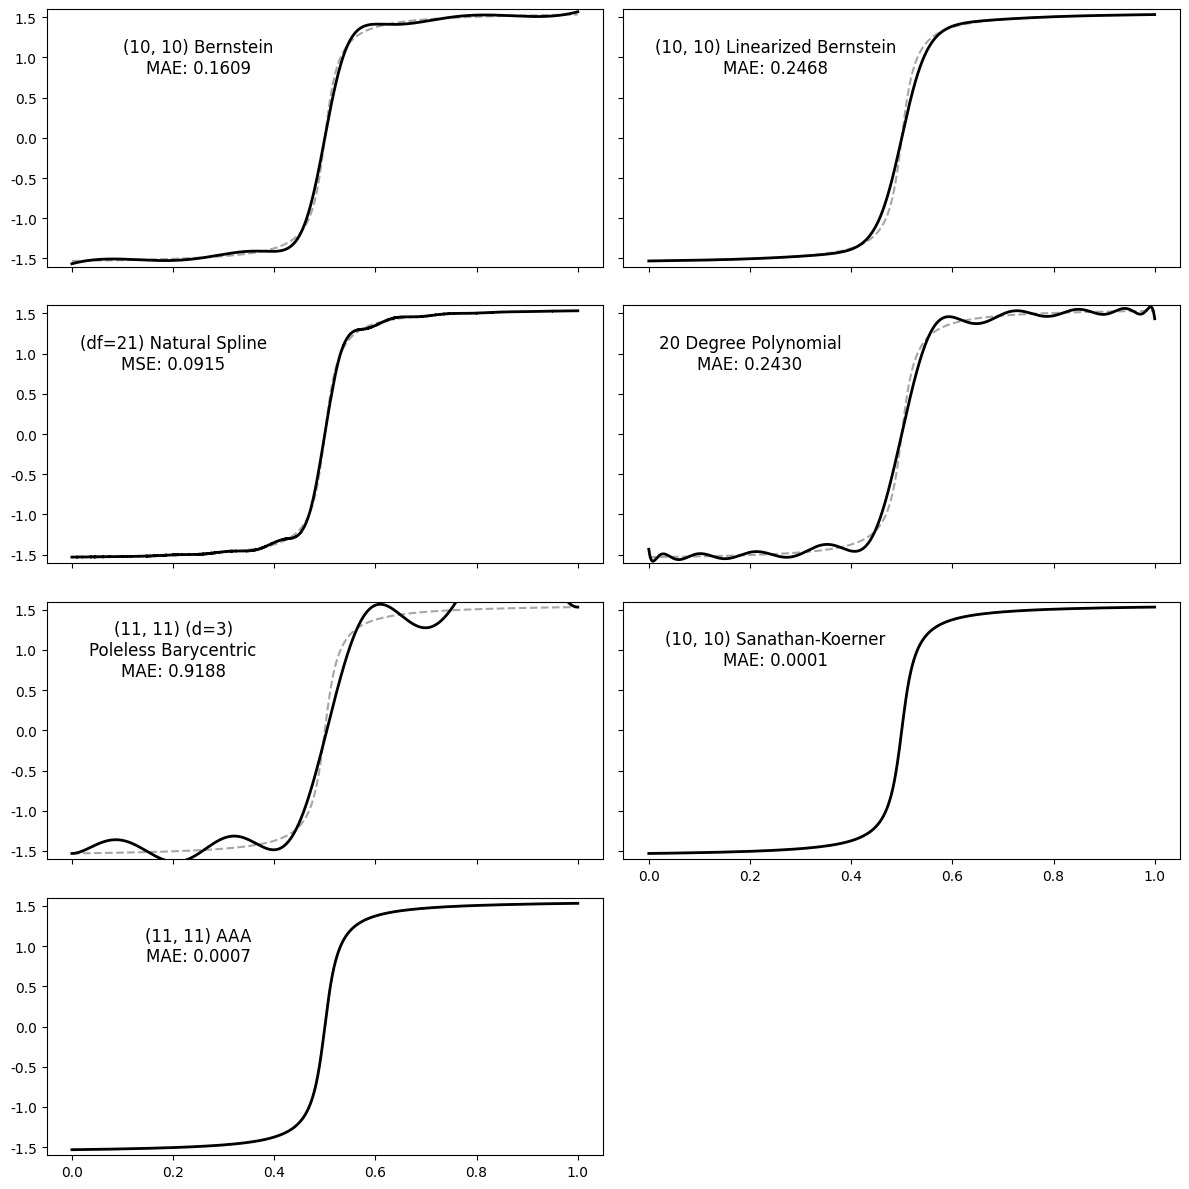

In [29]:
plt.figure(figsize=(12, 12))

x_vals = np.linspace(0, 1, 10_001)

i = 0
for name, approximator in approximators.items():
    plt.subplot(4, 2, i + 1)
    plt.plot(x, y, '--', alpha=0.7, color='grey')
    
    approximator.fit(x, y)
    mae = np.max(abs(approximator(x) - y))
    
    plt.plot(x_vals, approximator(x_vals), linewidth=2, color='black')
    
    if name == 'Polynomial':
        plt.text(0.2, 1, f"{approximator.n} Degree {name}\nMAE: {mae:.4f}", fontsize=12, 
                 horizontalalignment='center', verticalalignment='center')
    elif name == 'Poleless Barycentric':
        plt.text(0.2, 1, f"{approximator.n, approximator.m} (d={approximator.d})\n{name}\nMAE: {mae:.4f}", 
                 fontsize=12, horizontalalignment='center', verticalalignment='center')
    elif name == 'Natural Spline':
        plt.text(0.2, 1, f"(df={approximator.df + 1}) {name}\nMSE: {mae:.4f}", 
             fontsize=12, horizontalalignment='center', verticalalignment='center')
    else:
        plt.text(0.25, 1, f"{approximator.n, approximator.m} {name}\nMAE: {mae:.4f}", fontsize=12, 
                 horizontalalignment='center', verticalalignment='center')
    
    plt.ylim(-1.6, 1.6)
    
    if i < 5:
        plt.xticks(np.linspace(0, 1, 6), [None] * 6)
    else:
        plt.xticks(np.linspace(0, 1, 6), [round(x, 1) for x in np.linspace(0, 1, 6)])
    
    if (i + 1) % 2 == 0:
        plt.yticks(np.linspace(-1.5, 1.5, 7), [None] * 7)
    else:
        plt.yticks(np.linspace(-1.5, 1.5, 7), [round(x, 1) for x in np.linspace(-1.5, 1.5, 7)])
    
    i += 1
    
plt.tight_layout()
# plt.savefig(f"{working_folder}/tan_{name}_fits.png", dpi=150)
plt.savefig(f"{working_folder}/tan_fits.png", dpi=150)

## Abs

In [30]:
f = lambda x: abs(10 * (x - 0.5))

x = np.linspace(0, 1, 1001)
y = f(x)

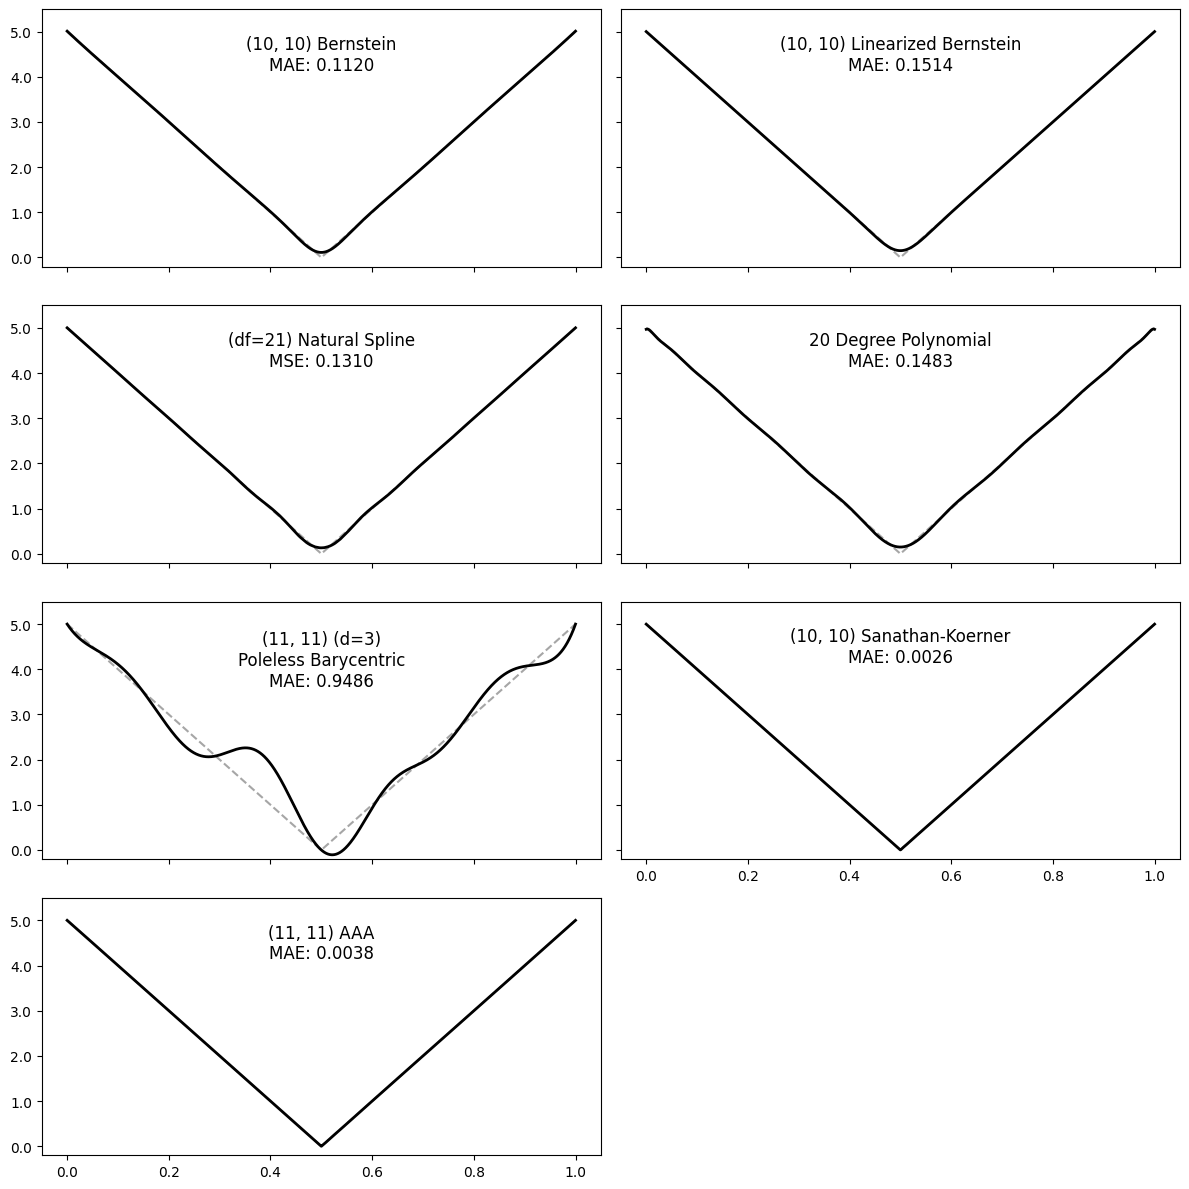

In [31]:
plt.figure(figsize=(12, 12))

x_vals = np.linspace(0, 1, 10_001)

i = 0
for name, approximator in approximators.items():
    plt.subplot(4, 2, i + 1)
    plt.plot(x, y, '--', alpha=0.7, color='grey')
    
    approximator.fit(x, y)
    mae = np.max(abs(approximator(x) - y))
    
    plt.plot(x_vals, approximator(x_vals), linewidth=2, color='black')
    
    if name == 'Polynomial':
        plt.text(0.5, 4.5, f"{approximator.n} Degree {name}\nMAE: {mae:.4f}", fontsize=12, 
                 horizontalalignment='center', verticalalignment='center')
    elif name == 'Poleless Barycentric':
        plt.text(0.5, 4.2, f"{approximator.n, approximator.m} (d={approximator.d})\n{name}\nMAE: {mae:.4f}", 
                 fontsize=12, horizontalalignment='center', verticalalignment='center')
    elif name == 'Natural Spline':
        plt.text(0.5, 4.5, f"(df={approximator.df + 1}) {name}\nMSE: {mae:.4f}", 
             fontsize=12, horizontalalignment='center', verticalalignment='center')
    else:
        plt.text(0.5, 4.5, f"{approximator.n, approximator.m} {name}\nMAE: {mae:.4f}", fontsize=12, 
                 horizontalalignment='center', verticalalignment='center')
    
    plt.ylim(-0.2, 5.5)
    
    if i < 5:
        plt.xticks(np.linspace(0, 1, 6), [None] * 6)
    else:
        plt.xticks(np.linspace(0, 1, 6), [round(x, 1) for x in np.linspace(0, 1, 6)])
    
    if (i + 1) % 2 == 0:
        plt.yticks(np.linspace(0, 5, 6), [None] * 6)
    else:
        plt.yticks(np.linspace(0, 5, 6), [round(x, 0) for x in np.linspace(0, 5, 6)])
    
    i += 1
    
plt.tight_layout()
# plt.savefig(f"{working_folder}/tan_{name}_fits.png", dpi=150)
plt.savefig(f"{working_folder}/abs_fits.png", dpi=150)

In [19]:
import os
os.system('pwd')

/Users/jameschok/git/RationalFunction/Plots


0